<a href="https://colab.research.google.com/github/otienocliff/Portfolio/blob/master/Marble%20_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

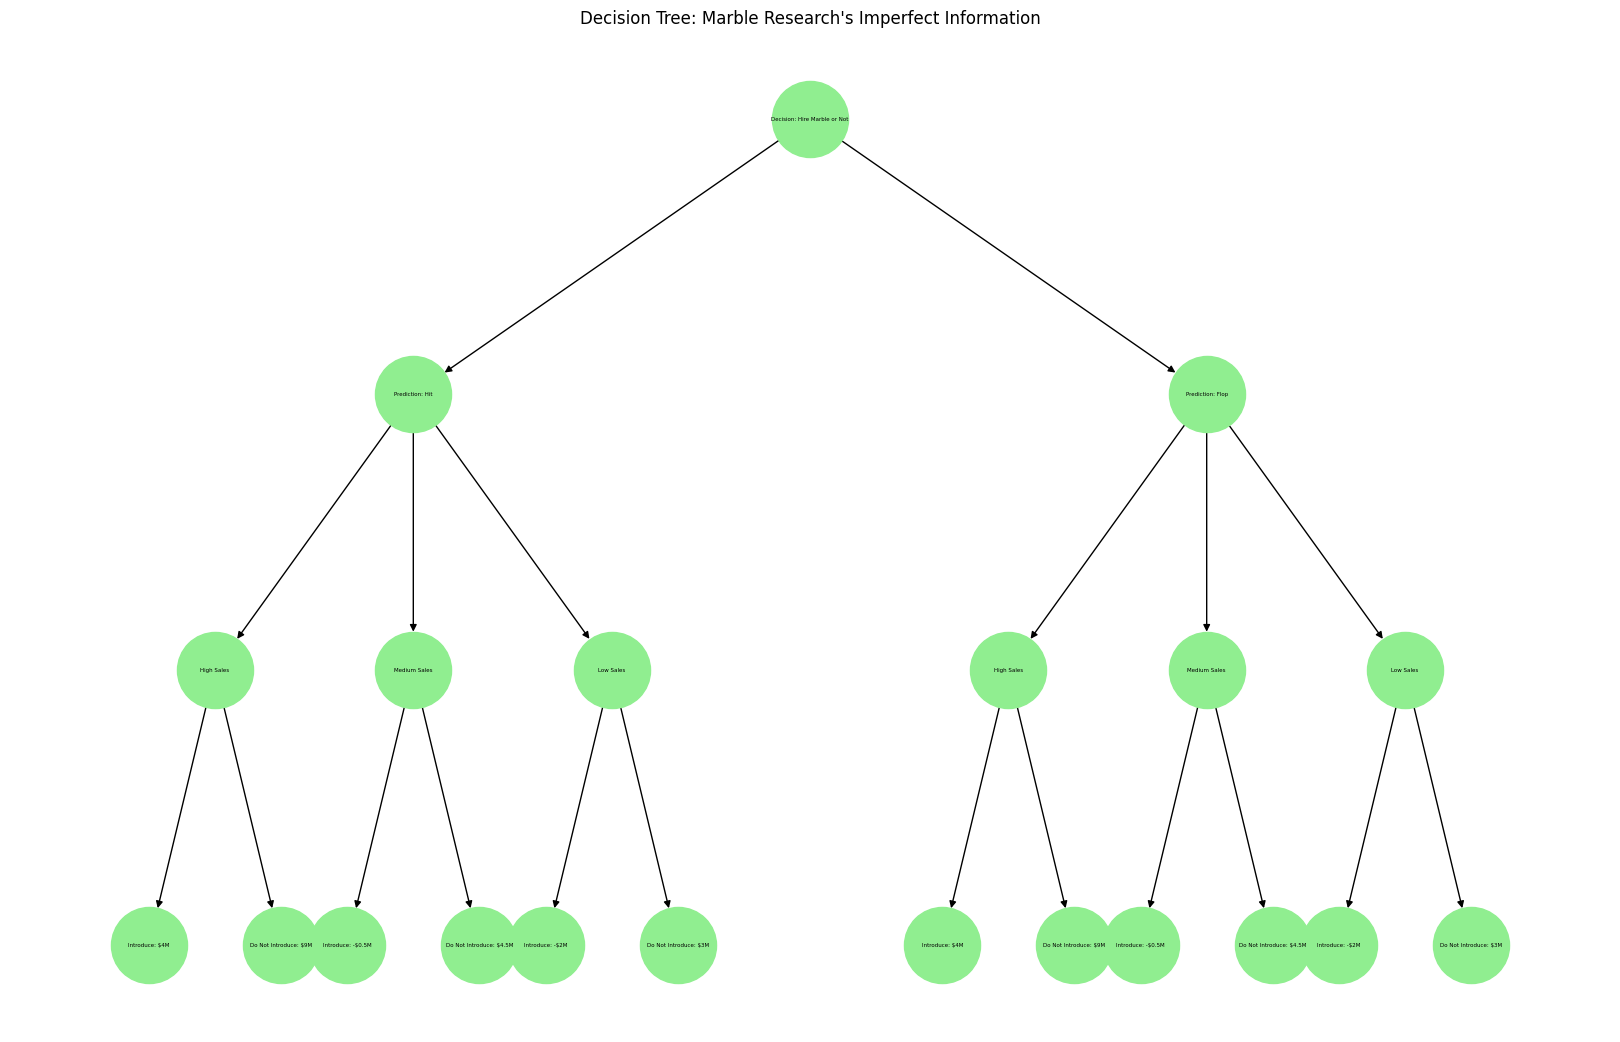

In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import networkx as nx

# Decision tree for imperfect information using Marble Research

# Create a new graph for the decision tree
marble_tree = nx.DiGraph()

# Add initial decision node
marble_tree.add_node("Start", pos=(0, 3), label="Decision: Hire Marble or Not")

# Add Marble's predictions
marble_tree.add_node("Marble: Hit", pos=(-3, 1.5), label="Prediction: Hit")
marble_tree.add_node("Marble: Flop", pos=(3, 1.5), label="Prediction: Flop")

# Add sales scenarios for "Hit" and "Flop" predictions
# Probabilities are placeholders; conditional probabilities will depend on Marble's accuracy
marble_tree.add_node("High Sales (Hit)", pos=(-4.5, 0), label="High Sales")
marble_tree.add_node("Medium Sales (Hit)", pos=(-3, 0), label="Medium Sales")
marble_tree.add_node("Low Sales (Hit)", pos=(-1.5, 0), label="Low Sales")
marble_tree.add_node("High Sales (Flop)", pos=(1.5, 0), label="High Sales")
marble_tree.add_node("Medium Sales (Flop)", pos=(3, 0), label="Medium Sales")
marble_tree.add_node("Low Sales (Flop)", pos=(4.5, 0), label="Low Sales")

# Add payoffs for each sales scenario under "Introduce" or "Do Not Introduce"
marble_tree.add_node("High - Introduce", pos=(-5, -1.5), label="Introduce: $4M")
marble_tree.add_node("High - Not Introduce", pos=(-4, -1.5), label="Do Not Introduce: $9M")
marble_tree.add_node("Medium - Introduce", pos=(-3.5, -1.5), label="Introduce: -$0.5M")
marble_tree.add_node("Medium - Not Introduce", pos=(-2.5, -1.5), label="Do Not Introduce: $4.5M")
marble_tree.add_node("Low - Introduce", pos=(-2, -1.5), label="Introduce: -$2M")
marble_tree.add_node("Low - Not Introduce", pos=(-1, -1.5), label="Do Not Introduce: $3M")
marble_tree.add_node("High - Introduce (Flop)", pos=(1, -1.5), label="Introduce: $4M")
marble_tree.add_node("High - Not Introduce (Flop)", pos=(2, -1.5), label="Do Not Introduce: $9M")
marble_tree.add_node("Medium - Introduce (Flop)", pos=(2.5, -1.5), label="Introduce: -$0.5M")
marble_tree.add_node("Medium - Not Introduce (Flop)", pos=(3.5, -1.5), label="Do Not Introduce: $4.5M")
marble_tree.add_node("Low - Introduce (Flop)", pos=(4, -1.5), label="Introduce: -$2M")
marble_tree.add_node("Low - Not Introduce (Flop)", pos=(5, -1.5), label="Do Not Introduce: $3M")

# Add edges to connect the nodes
edges = [
    ("Start", "Marble: Hit"),
    ("Start", "Marble: Flop"),
    ("Marble: Hit", "High Sales (Hit)"),
    ("Marble: Hit", "Medium Sales (Hit)"),
    ("Marble: Hit", "Low Sales (Hit)"),
    ("Marble: Flop", "High Sales (Flop)"),
    ("Marble: Flop", "Medium Sales (Flop)"),
    ("Marble: Flop", "Low Sales (Flop)"),
    ("High Sales (Hit)", "High - Introduce"),
    ("High Sales (Hit)", "High - Not Introduce"),
    ("Medium Sales (Hit)", "Medium - Introduce"),
    ("Medium Sales (Hit)", "Medium - Not Introduce"),
    ("Low Sales (Hit)", "Low - Introduce"),
    ("Low Sales (Hit)", "Low - Not Introduce"),
    ("High Sales (Flop)", "High - Introduce (Flop)"),
    ("High Sales (Flop)", "High - Not Introduce (Flop)"),
    ("Medium Sales (Flop)", "Medium - Introduce (Flop)"),
    ("Medium Sales (Flop)", "Medium - Not Introduce (Flop)"),
    ("Low Sales (Flop)", "Low - Introduce (Flop)"),
    ("Low Sales (Flop)", "Low - Not Introduce (Flop)"),
]

marble_tree.add_edges_from(edges)

# Plot the decision tree
plt.figure(figsize=(16, 10))
pos = nx.get_node_attributes(marble_tree, 'pos')
labels = nx.get_node_attributes(marble_tree, 'label')

# Draw the tree nodes and edges
nx.draw(marble_tree, pos, with_labels=False, node_size=3000, node_color="lightgreen", edge_color="black")
nx.draw_networkx_labels(marble_tree, pos, labels, font_size=4, font_color="black")

plt.title("Decision Tree: Marble Research's Imperfect Information")
plt.axis('off')
plt.show()


In [ ]:
# Example variables (with realistic probabilities and payoffs)
payoff_high_sales_introduce = 500000
payoff_medium_sales_introduce = 300000
payoff_low_sales_introduce = 100000

payoff_high_sales_no_introduce = 200000
payoff_medium_sales_no_introduce = 150000
payoff_low_sales_no_introduce = 50000

prob_high_sales = 0.3
prob_medium_sales = 0.4
prob_low_sales = 0.3

true_positive_rate = 0.8
false_positive_rate = 0.2
true_negative_rate = 0.75
false_negative_rate = 0.25

BRC_fee = 150000

# Calculate the EVwoPI
EVwoPI = (prob_high_sales * payoff_high_sales_introduce) + (prob_medium_sales * payoff_medium_sales_introduce) + (prob_low_sales * payoff_low_sales_introduce)

# Adjusted probabilities for "Hit" and "Flop"
prob_high_hit = true_positive_rate
prob_medium_hit = false_positive_rate * prob_medium_sales
prob_low_hit = false_positive_rate * prob_low_sales

prob_high_flop = false_negative_rate * prob_high_sales
prob_medium_flop = false_negative_rate * prob_medium_sales
prob_low_flop = true_negative_rate

EV_hit = (prob_high_hit * payoff_high_sales_introduce) + (prob_medium_hit * payoff_medium_sales_introduce) + (prob_low_hit * payoff_low_sales_introduce)
EV_flop = (prob_high_flop * payoff_high_sales_introduce) + (prob_medium_flop * payoff_medium_sales_introduce) + (prob_low_flop * payoff_low_sales_introduce)

P_hit = 0.5
P_flop = 0.5

EVwSI = (P_hit * EV_hit) + (P_flop * EV_flop)
EVSI = EVwSI - EVwoPI

# Print the results
print(f"EVwoPI: ${EVwoPI:,.2f}")
print(f"EVwSI: ${EVwSI:,.2f}")
print(f"EVSI: ${EVSI:,.2f}")
print(f"Maximum price to pay for BRC's forecast: ${EVSI:,.2f}")


EVwoPI: $300,000.00
EVwSI: $286,250.00
EVSI: $-13,750.00
Maximum price to pay for BRC's forecast: $-13,750.00


<ipython-input-7-39b6ca41b7a8>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sales Scenario'] = X['Sales Scenario'].map({'High': 2, 'Medium': 1, 'Low': 0})


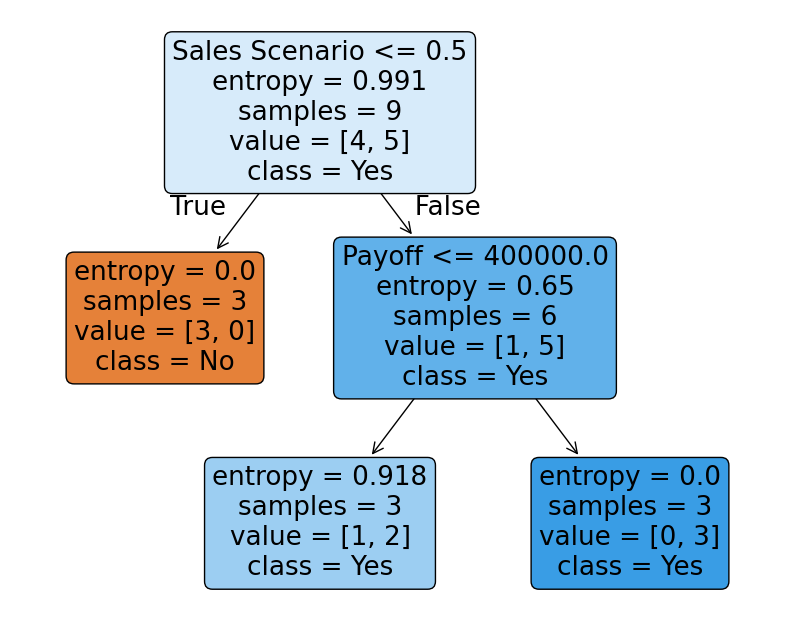

Decision Tree Prediction for each scenario:
High Sales Scenario (2, 0.3, 500000): [1]
Medium Sales Scenario (1, 0.4, 300000): [1]
Low Sales Scenario (0, 0.3, 100000): [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


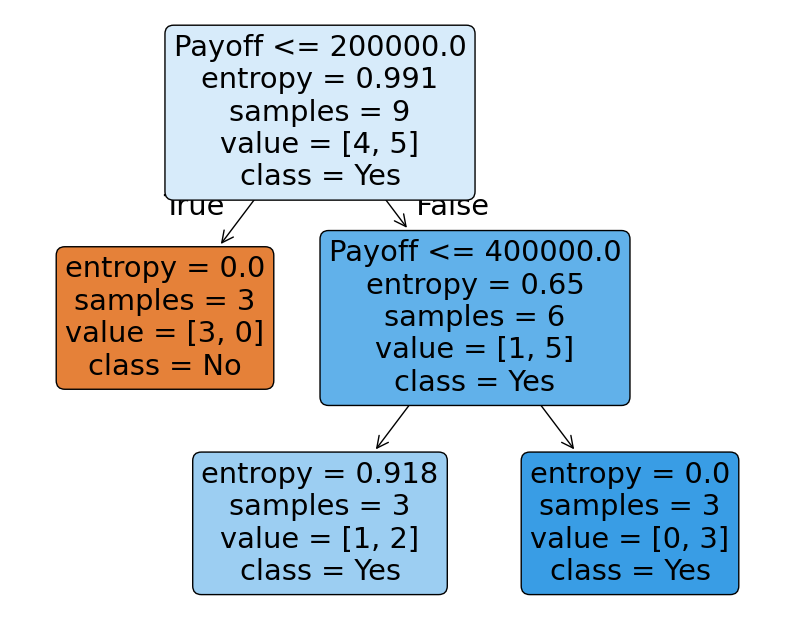

In [ ]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Define the dataset
data = {
    'Sales Scenario': ['High', 'Medium', 'Low', 'High', 'Medium', 'Low', 'High', 'Medium', 'Low'],
    'Introduce Formula': [1, 1, 0, 1, 0, 0, 1, 1, 0],  # 1 = Yes, 0 = No (Outcome based on introduction decision)
    'Sales Probability': [0.3, 0.4, 0.3, 0.3, 0.4, 0.3, 0.3, 0.4, 0.3],  # Probabilities (could be adjusted)
    'Payoff': [500000, 300000, 100000, 500000, 300000, 100000, 500000, 300000, 100000]  # Payoff values (profits for each decision)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Feature columns (Sales Scenario, Sales Probability, Payoff) and target column (Introduce Formula)
X = df[['Sales Scenario', 'Sales Probability', 'Payoff']]  # Features
y = df['Introduce Formula']  # Target variable

# Encode 'Sales Scenario' as a numeric value
X['Sales Scenario'] = X['Sales Scenario'].map({'High': 2, 'Medium': 1, 'Low': 0})

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy')

# Train the model
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(10,8))
tree.plot_tree(clf, filled=True, feature_names=['Sales Scenario', 'Sales Probability', 'Payoff'], class_names=['No', 'Yes'], rounded=True)
plt.show()

# Decision path
print("Decision Tree Prediction for each scenario:")
print("High Sales Scenario (2, 0.3, 500000):", clf.predict([[2, 0.3, 500000]]))
print("Medium Sales Scenario (1, 0.4, 300000):", clf.predict([[1, 0.4, 300000]]))
print("Low Sales Scenario (0, 0.3, 100000):", clf.predict([[0, 0.3, 100000]]))
# Create and train a decision tree with constraints
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=2)
clf.fit(X, y)

# Visualize the tree again with updated parameters
plt.figure(figsize=(10,8))
tree.plot_tree(clf, filled=True, feature_names=['Sales Scenario', 'Sales Probability', 'Payoff'], class_names=['No', 'Yes'], rounded=True)
plt.show()


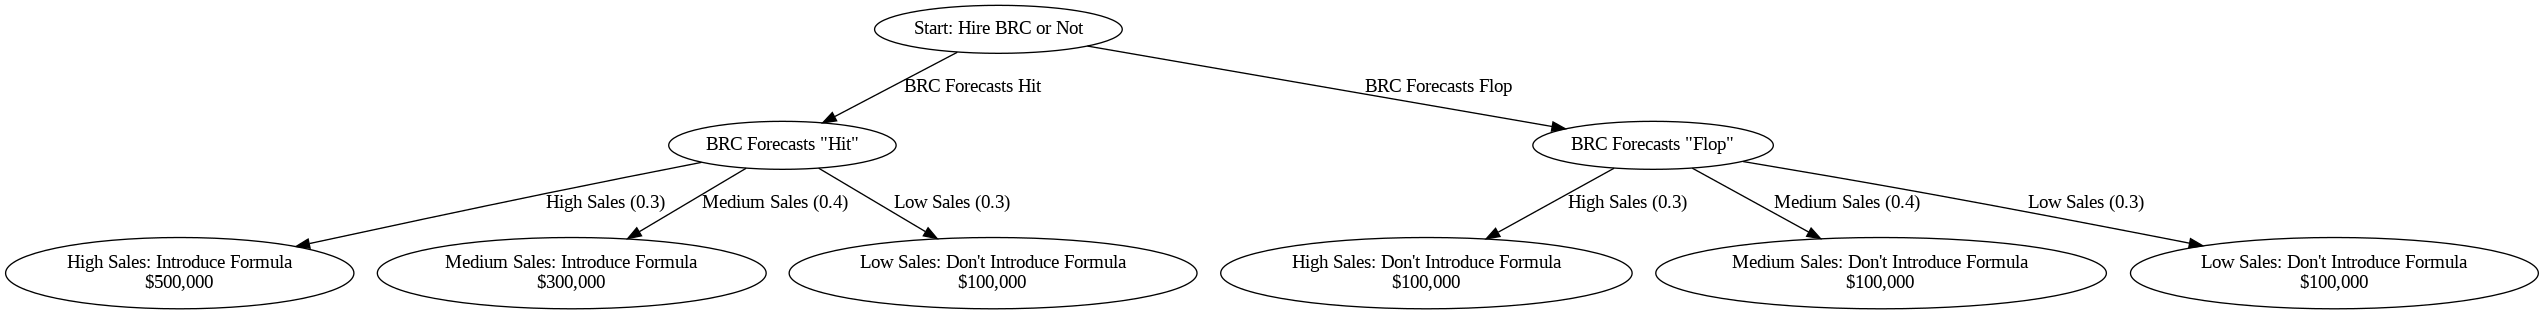

In [ ]:
!pip install graphviz matplotlib

import matplotlib.pyplot as plt
from graphviz import Digraph

# Create the decision tree using Graphviz
def create_decision_tree():
    dot = Digraph(comment='Decision Tree for Hiring BRC')

    # Create nodes representing decisions and outcomes
    dot.node('A', 'Start: Hire BRC or Not', shape='ellipse')

    dot.node('B', 'BRC Forecasts "Hit"')
    dot.node('C', 'BRC Forecasts "Flop"')

    dot.node('D', 'High Sales: Introduce Formula\n$500,000')
    dot.node('E', 'Medium Sales: Introduce Formula\n$300,000')
    dot.node('F', 'Low Sales: Don\'t Introduce Formula\n$100,000')

    dot.node('G', 'High Sales: Don\'t Introduce Formula\n$100,000')
    dot.node('H', 'Medium Sales: Don\'t Introduce Formula\n$100,000')
    dot.node('I', 'Low Sales: Don\'t Introduce Formula\n$100,000')

    # Connect the nodes to show decision flow
    dot.edge('A', 'B', label='BRC Forecasts Hit')
    dot.edge('A', 'C', label='BRC Forecasts Flop')

    # High, Medium, Low Sales under "Hit" forecast
    dot.edge('B', 'D', label='High Sales (0.3)')
    dot.edge('B', 'E', label='Medium Sales (0.4)')
    dot.edge('B', 'F', label='Low Sales (0.3)')

    # High, Medium, Low Sales under "Flop" forecast
    dot.edge('C', 'G', label='High Sales (0.3)')
    dot.edge('C', 'H', label='Medium Sales (0.4)')
    dot.edge('C', 'I', label='Low Sales (0.3)')

    # Render the decision tree and display it in Colab
    return dot

# Run the function to generate and display the decision tree
dot = create_decision_tree()
dot.render('/content/decision_tree_brc', format='png', view=False)

# Display the tree in the notebook
from IPython.display import Image
Image(filename='/content/decision_tree_brc.png')

